In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# plt 한국어 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
df = pd.read_excel("/content/최종 데이터셋(시트1).xlsx")
df

,LOTID,라우트,전체공정,품명(코드화),품명,공정(번호),세부공정,시작시간,종료시간,시차(초),개수,개당 소요\n시간(초)
0,N1803120140100,R3_06,MCT > 후처리 > 입고처리,BU-TCS-11940-00-0-04,Triton Ch Slid Lift Base Under AL6061각재,3000,MCT/밀링/TAP,2018-04-20 09:30:24.010,2018-04-23 16:42:16.343,285112,50,5702.24
1,N1803120140100,R3_06,MCT > 후처리 > 입고처리,BU-TCS-11940-00-0-04,Triton Ch Slid Lift Base Under AL6061각재,6000,후처리,2018-04-23 16:42:16.360,2018-05-10 11:00:29.747,1448293,50,28965.86
2,N1803120140100,R3_06,MCT > 후처리 > 입고처리,BU-TCS-11940-00-0-04,Triton Ch Slid Lift Base Under AL6061각재,6500,수입검사(용접자재),2018-05-10 11:00:29.760,2018-05-10 11:03:22.407,173,50,3.46
3,N1803120180100,R2_08,CNC > MCT > 후처리 > 입고처리,BU-TCS-11940-00-0-10,Triton Ch Slid Worm Cover-4 AL6061봉재,2000,CNC/선반/SAW,2018-09-18 09:33:24.007,2018-09-18 09:35:18.473,114,50,2.28
4,N1803120180100,R2_08,CNC > MCT > 후처리 > 입고처리,BU-TCS-11940-00-0-10,Triton Ch Slid Worm Cover-4 AL6061봉재,3000,MCT/밀링/TAP,2018-09-18 09:35:18.487,2018-09-18 09:56:24.903,1266,50,25.32
...,...,...,...,...,...,...,...,...,...,...,...,...
91688,N2204270370100,R2_03,CNC > 세정 > 입고처리,AY-KSW-SRING-00-0-02,SUS RING-2,2000,CNC/선반/SAW,2022-05-02 21:22:33.257,2022-05-02 21:23:06.597,33,120,0.28
91689,N2204270370100,R2_03,CNC > 세정 > 입고처리,AY-KSW-SRING-00-0-02,SUS RING-2,4000,세정,2022-05-02 21:23:06.630,2022-05-03 08:49:49.777,41203,120,343.36
91690,N2204270830100,R5_11,용접 > 후처리 > 입고처리,BU-KSW-GHUD0-00-1,GEAR UNDER HOUSING ASSY-W,5000,용접,2022-05-02 13:36:05.567,2022-05-02 21:51:57.030,29752,16,1859.50
91691,N2204270840100,R5_11,용접 > 후처리 > 입고처리,BU-KSW-GHUP0-00-1,GEAR UPPER HOUSING ASSY-W,5000,용접,2022-05-02 13:36:19.377,2022-05-02 21:52:04.607,29745,16,1859.06


In [ ]:
for i in df["품명(코드화)"]:
  print(i)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
BU-NCF-A2060-00-0-01
BU-NCF-A2060-00-0-01
BU-NCF-A2060-00-0-01
BU-NCF-A2060-00-0-01
DP-063-01102-D1-0
DP-063-01102-D1-0
DP-063-01102-D1-0
DP-063-01102-D1-0
DP-063-01201-D1-5
DP-063-01201-D1-5
DP-063-01201-D1-5
DP-063-01203-D1-4
DP-063-01203-D1-4
DP-063-01203-D1-4
DP-063-01301-D1-1
DP-063-01301-D1-1
DP-063-01301-D1-1
DP-063-01301-D1-1
BU-NCF-A2060-00-1
BU-NCF-A2060-00-1
BU-NCF-A2060-00-1
AY-OLT-4UOLT-00-1
AY-OLT-4UOLT-00-1
AY-OLT-4UOLT-00-1
ZD-TST-6A018-00-1-01
ZD-TST-6A018-00-1-01
ZD-TST-6A017-00-1-01
ZD-TST-6A017-00-1-01
ZD-TST-6A016-00-1-05
ZD-TST-6A016-00-1-05
ZD-TST-6A007-00-0-06
ZD-TST-6A007-00-0-06
BU-ITB-07910-00-1-04
BU-ITB-07910-00-1-04
BU-ITB-07910-00-1-03
BU-ITB-07910-00-1-03
BU-ITB-07910-00-1-03
BU-BNS-29530-00-1-01
BU-BNS-29530-00-1-01
BU-BNS-29530-00-1-01
BU-KSW-F0129-08-0-01
BU-KSW-F0129-08-0-01
BU-KSW-F0129-08-0-01
DP-100-11016-D1-1-00
DP-100-11016-D1-1-00
DP-100-01201-D1-4-01
DP-100-01201-D1-4-01
DP-100-01203-D1-4-01
AY-MHS-0T007-00-

In [ ]:
df = df.reset_index()
df

,index,LOTID,라우트,전체공정,품명(코드화),품명,공정(번호),세부공정,시작시간,종료시간,시차(초),개수,개당 소요\n시간(초)
0,0,N1803120140100,R3_06,MCT > 후처리 > 입고처리,BU-TCS-11940-00-0-04,Triton Ch Slid Lift Base Under AL6061각재,3000,MCT/밀링/TAP,2018-04-20 09:30:24.010,2018-04-23 16:42:16.343,285112,50,5702.24
1,1,N1803120140100,R3_06,MCT > 후처리 > 입고처리,BU-TCS-11940-00-0-04,Triton Ch Slid Lift Base Under AL6061각재,6000,후처리,2018-04-23 16:42:16.360,2018-05-10 11:00:29.747,1448293,50,28965.86
2,2,N1803120140100,R3_06,MCT > 후처리 > 입고처리,BU-TCS-11940-00-0-04,Triton Ch Slid Lift Base Under AL6061각재,6500,수입검사(용접자재),2018-05-10 11:00:29.760,2018-05-10 11:03:22.407,173,50,3.46
3,3,N1803120180100,R2_08,CNC > MCT > 후처리 > 입고처리,BU-TCS-11940-00-0-10,Triton Ch Slid Worm Cover-4 AL6061봉재,2000,CNC/선반/SAW,2018-09-18 09:33:24.007,2018-09-18 09:35:18.473,114,50,2.28
4,4,N1803120180100,R2_08,CNC > MCT > 후처리 > 입고처리,BU-TCS-11940-00-0-10,Triton Ch Slid Worm Cover-4 AL6061봉재,3000,MCT/밀링/TAP,2018-09-18 09:35:18.487,2018-09-18 09:56:24.903,1266,50,25.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91688,91688,N2204270370100,R2_03,CNC > 세정 > 입고처리,AY-KSW-SRING-00-0-02,SUS RING-2,2000,CNC/선반/SAW,2022-05-02 21:22:33.257,2022-05-02 21:23:06.597,33,120,0.28
91689,91689,N2204270370100,R2_03,CNC > 세정 > 입고처리,AY-KSW-SRING-00-0-02,SUS RING-2,4000,세정,2022-05-02 21:23:06.630,2022-05-03 08:49:49.777,41203,120,343.36
91690,91690,N2204270830100,R5_11,용접 > 후처리 > 입고처리,BU-KSW-GHUD0-00-1,GEAR UNDER HOUSING ASSY-W,5000,용접,2022-05-02 13:36:05.567,2022-05-02 21:51:57.030,29752,16,1859.50
91691,91691,N2204270840100,R5_11,용접 > 후처리 > 입고처리,BU-KSW-GHUP0-00-1,GEAR UPPER HOUSING ASSY-W,5000,용접,2022-05-02 13:36:19.377,2022-05-02 21:52:04.607,29745,16,1859.06


In [ ]:
df["고객사"] = np.nan
df.loc[0,"고객사"] = 1
df

,index,LOTID,라우트,전체공정,품명(코드화),품명,공정(번호),세부공정,시작시간,종료시간,시차(초),개수,개당 소요\n시간(초),고객사
0,0,N1803120140100,R3_06,MCT > 후처리 > 입고처리,BU-TCS-11940-00-0-04,Triton Ch Slid Lift Base Under AL6061각재,3000,MCT/밀링/TAP,2018-04-20 09:30:24.010,2018-04-23 16:42:16.343,285112,50,5702.24,1.0
1,1,N1803120140100,R3_06,MCT > 후처리 > 입고처리,BU-TCS-11940-00-0-04,Triton Ch Slid Lift Base Under AL6061각재,6000,후처리,2018-04-23 16:42:16.360,2018-05-10 11:00:29.747,1448293,50,28965.86,NaN
2,2,N1803120140100,R3_06,MCT > 후처리 > 입고처리,BU-TCS-11940-00-0-04,Triton Ch Slid Lift Base Under AL6061각재,6500,수입검사(용접자재),2018-05-10 11:00:29.760,2018-05-10 11:03:22.407,173,50,3.46,NaN
3,3,N1803120180100,R2_08,CNC > MCT > 후처리 > 입고처리,BU-TCS-11940-00-0-10,Triton Ch Slid Worm Cover-4 AL6061봉재,2000,CNC/선반/SAW,2018-09-18 09:33:24.007,2018-09-18 09:35:18.473,114,50,2.28,NaN
4,4,N1803120180100,R2_08,CNC > MCT > 후처리 > 입고처리,BU-TCS-11940-00-0-10,Triton Ch Slid Worm Cover-4 AL6061봉재,3000,MCT/밀링/TAP,2018-09-18 09:35:18.487,2018-09-18 09:56:24.903,1266,50,25.32,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91688,91688,N2204270370100,R2_03,CNC > 세정 > 입고처리,AY-KSW-SRING-00-0-02,SUS RING-2,2000,CNC/선반/SAW,2022-05-02 21:22:33.257,2022-05-02 21:23:06.597,33,120,0.28,NaN
91689,91689,N2204270370100,R2_03,CNC > 세정 > 입고처리,AY-KSW-SRING-00-0-02,SUS RING-2,4000,세정,2022-05-02 21:23:06.630,2022-05-03 08:49:49.777,41203,120,343.36,NaN
91690,91690,N2204270830100,R5_11,용접 > 후처리 > 입고처리,BU-KSW-GHUD0-00-1,GEAR UNDER HOUSING ASSY-W,5000,용접,2022-05-02 13:36:05.567,2022-05-02 21:51:57.030,29752,16,1859.50,NaN
91691,91691,N2204270840100,R5_11,용접 > 후처리 > 입고처리,BU-KSW-GHUP0-00-1,GEAR UPPER HOUSING ASSY-W,5000,용접,2022-05-02 13:36:19.377,2022-05-02 21:52:04.607,29745,16,1859.06,NaN


In [ ]:
df["고객사"] = np.nan
j = 0

for i in df["품명(코드화)"]:
  df.loc[j,"고객사"] = i[:2]
  j+=1
df

,LOTID,라우트,전체공정,품명(코드화),품명,공정(번호),세부공정,시작시간,종료시간,시차(초),개수,개당 소요\n시간(초),고객사
0,N1803120140100,R3_06,MCT > 후처리 > 입고처리,BU-TCS-11940-00-0-04,Triton Ch Slid Lift Base Under AL6061각재,3000,MCT/밀링/TAP,2018-04-20 09:30:24.010,2018-04-23 16:42:16.343,285112,50,5702.24,BU
1,N1803120140100,R3_06,MCT > 후처리 > 입고처리,BU-TCS-11940-00-0-04,Triton Ch Slid Lift Base Under AL6061각재,6000,후처리,2018-04-23 16:42:16.360,2018-05-10 11:00:29.747,1448293,50,28965.86,BU
2,N1803120140100,R3_06,MCT > 후처리 > 입고처리,BU-TCS-11940-00-0-04,Triton Ch Slid Lift Base Under AL6061각재,6500,수입검사(용접자재),2018-05-10 11:00:29.760,2018-05-10 11:03:22.407,173,50,3.46,BU
3,N1803120180100,R2_08,CNC > MCT > 후처리 > 입고처리,BU-TCS-11940-00-0-10,Triton Ch Slid Worm Cover-4 AL6061봉재,2000,CNC/선반/SAW,2018-09-18 09:33:24.007,2018-09-18 09:35:18.473,114,50,2.28,BU
4,N1803120180100,R2_08,CNC > MCT > 후처리 > 입고처리,BU-TCS-11940-00-0-10,Triton Ch Slid Worm Cover-4 AL6061봉재,3000,MCT/밀링/TAP,2018-09-18 09:35:18.487,2018-09-18 09:56:24.903,1266,50,25.32,BU
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91688,N2204270370100,R2_03,CNC > 세정 > 입고처리,AY-KSW-SRING-00-0-02,SUS RING-2,2000,CNC/선반/SAW,2022-05-02 21:22:33.257,2022-05-02 21:23:06.597,33,120,0.28,AY
91689,N2204270370100,R2_03,CNC > 세정 > 입고처리,AY-KSW-SRING-00-0-02,SUS RING-2,4000,세정,2022-05-02 21:23:06.630,2022-05-03 08:49:49.777,41203,120,343.36,AY
91690,N2204270830100,R5_11,용접 > 후처리 > 입고처리,BU-KSW-GHUD0-00-1,GEAR UNDER HOUSING ASSY-W,5000,용접,2022-05-02 13:36:05.567,2022-05-02 21:51:57.030,29752,16,1859.50,BU
91691,N2204270840100,R5_11,용접 > 후처리 > 입고처리,BU-KSW-GHUP0-00-1,GEAR UPPER HOUSING ASSY-W,5000,용접,2022-05-02 13:36:19.377,2022-05-02 21:52:04.607,29745,16,1859.06,BU


In [ ]:
df[(df["품명"] == "BOTTOM FLANGE")& (df["고객사"] == "AY")]

,index,LOTID,라우트,전체공정,품명(코드화),품명,공정(번호),세부공정,시작시간,종료시간,시차(초),개수,개당 소요\n시간(초),고객사
1056,1056,N1809140100100,R2_04,CNC > MCT > 세정 > 입고처리,AY-MCB-SE412-00-1-04,BOTTOM FLANGE,2000,CNC/선반/SAW,2018-09-17 08:36:13.647,2018-09-17 08:37:52.550,99,2,49.5,AY
1057,1057,N1809140100100,R2_04,CNC > MCT > 세정 > 입고처리,AY-MCB-SE412-00-1-04,BOTTOM FLANGE,3000,MCT/밀링/TAP,2018-09-17 08:37:52.563,2018-09-17 13:47:22.980,18570,2,9285.0,AY
1058,1058,N1809140100100,R2_04,CNC > MCT > 세정 > 입고처리,AY-MCB-SE412-00-1-04,BOTTOM FLANGE,4000,세정,2018-09-17 13:47:22.997,2018-09-17 17:46:55.433,14373,2,7186.5,AY
1123,1123,N1809190080100,R2_04,CNC > MCT > 세정 > 입고처리,AY-MCB-SE412-00-1-04,BOTTOM FLANGE,2000,CNC/선반/SAW,2018-09-19 08:45:20.400,2018-09-19 09:01:36.753,976,10,97.6,AY
1124,1124,N1809190080100,R2_04,CNC > MCT > 세정 > 입고처리,AY-MCB-SE412-00-1-04,BOTTOM FLANGE,3000,MCT/밀링/TAP,2018-09-19 09:01:36.767,2018-09-19 09:04:26.427,170,10,17.0,AY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91514,91514,N2204220640100,R2_03,CNC > 세정 > 입고처리,AY-OLT-0T003-TT-1-02,BOTTOM FLANGE,4000,세정,2022-04-27 14:47:57.163,2022-04-27 15:34:46.713,2809,1,2809.0,AY
91575,91575,N2204221010100,R2_03,CNC > 세정 > 입고처리,AY-MCB-FP002-00-1-10,BOTTOM FLANGE,2000,CNC/선반/SAW,2022-04-26 18:01:01.563,2022-04-26 19:00:25.373,3564,1,3564.0,AY
91576,91576,N2204221010100,R2_03,CNC > 세정 > 입고처리,AY-MCB-FP002-00-1-10,BOTTOM FLANGE,4000,세정,2022-04-26 19:00:25.407,2022-04-27 09:34:23.980,52438,1,52438.0,AY
91645,91645,N2204260510100,R2_03,CNC > 세정 > 입고처리,AY-HCB-0TB01-00-1-07,BOTTOM FLANGE,2000,CNC/선반/SAW,2022-04-29 21:30:38.300,2022-04-30 08:41:22.590,40244,2,20122.0,AY


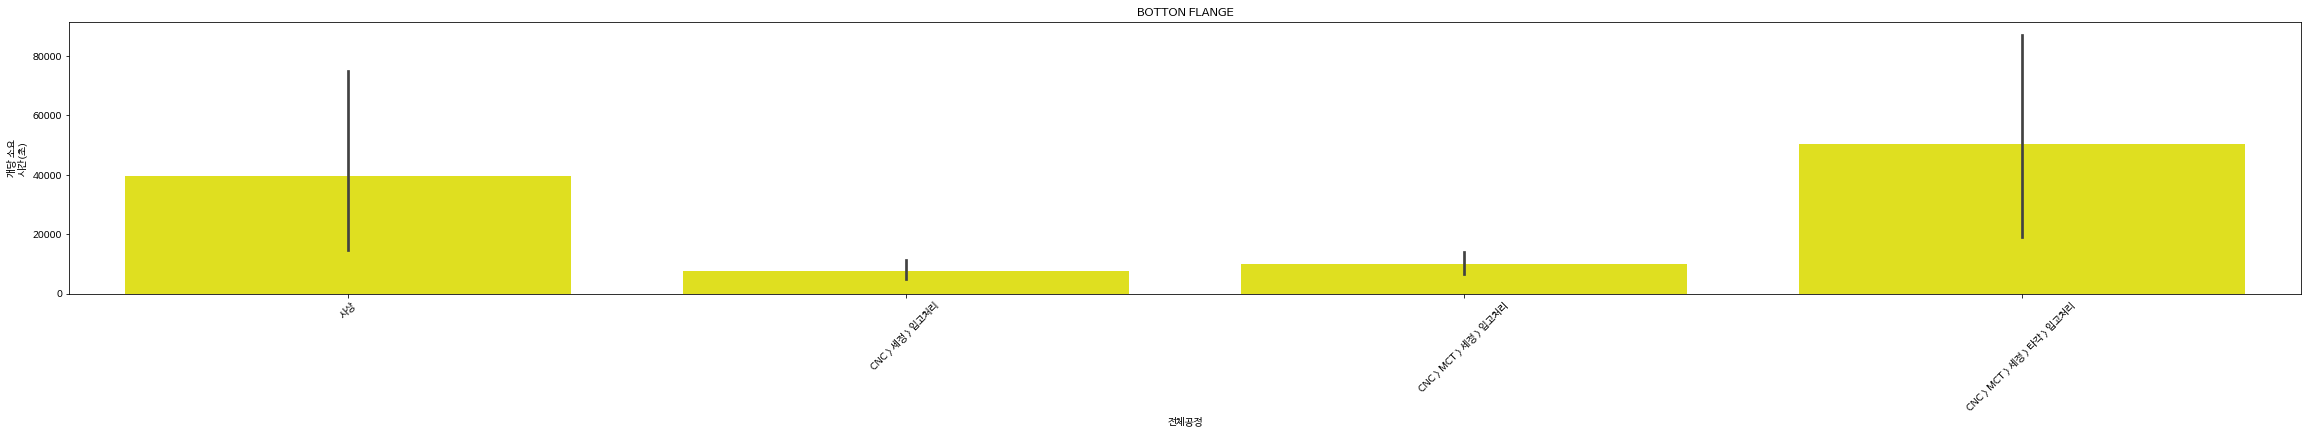

In [ ]:
df_BOTTOM_FLANGE = df[(df["품명"] == "Bottom Flange")& (df["고객사"] == "AY")]

plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("BOTTON FLANGE")
sns.barplot(x = '전체공정', y = '개당 소요\n시간(초)', data=df_BOTTOM_FLANGE, color = "yellow")
plt.show()

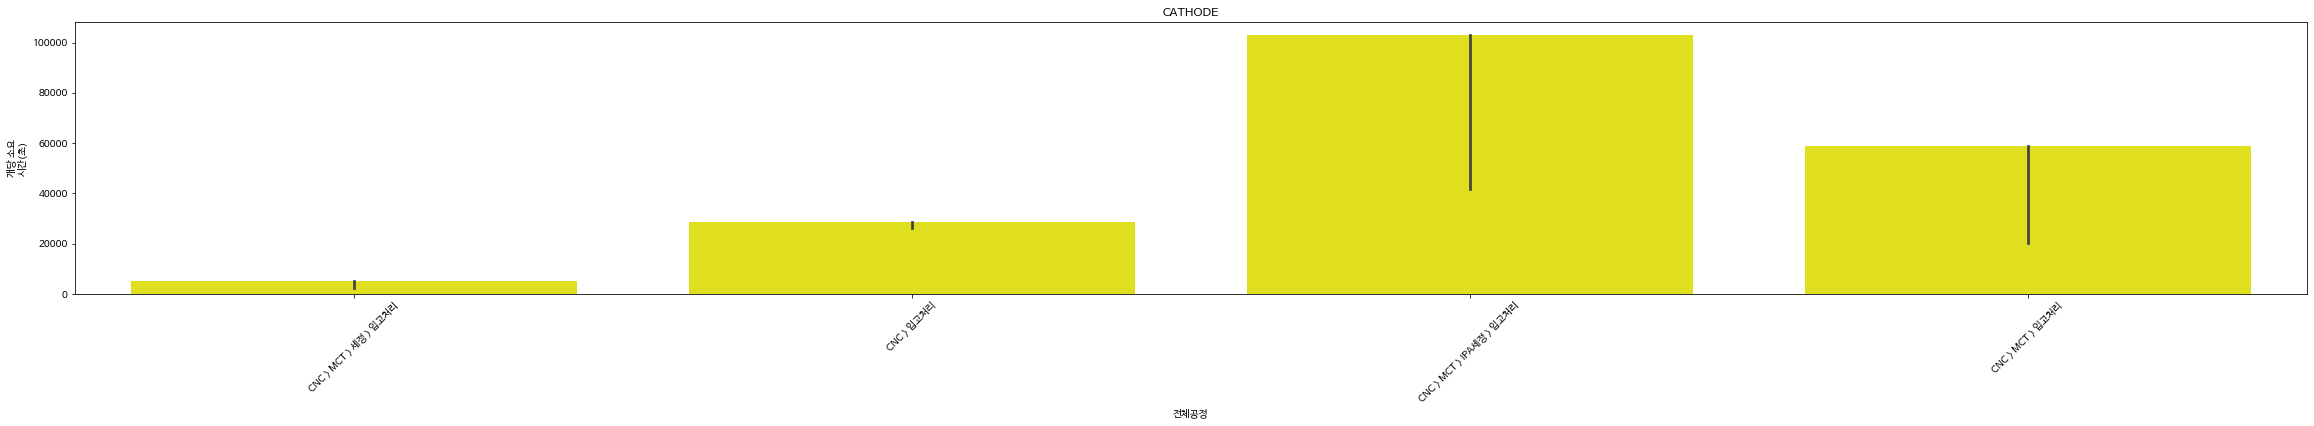

In [ ]:
df_CATHODE = df[(df["품명"] == "CATHODE")& (df["고객사"] == "BU")]

plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("CATHODE")
sns.barplot(x = '전체공정', y = '개당 소요\n시간(초)', data=df_CATHODE, color = "yellow", estimator=np.max)
plt.show()

In [ ]:
df[(df["품명"] == "INJECTOR BODY")& (df["고객사"] == "BU")]

,index,LOTID,라우트,전체공정,품명(코드화),품명,공정(번호),세부공정,시작시간,종료시간,시차(초),개수,개당 소요\n시간(초),고객사
687,687,N1807300060100,R2_04,CNC > MCT > 세정 > 입고처리,BU-IFA-35011-00-1-01,INJECTOR BODY,2000,CNC/선반/SAW,2018-08-02 09:19:23.940,2018-08-03 13:33:02.460,101619,50,2032.38,BU
688,688,N1807300060100,R2_04,CNC > MCT > 세정 > 입고처리,BU-IFA-35011-00-1-01,INJECTOR BODY,3000,MCT/밀링/TAP,2018-08-03 13:33:02.490,2018-08-14 09:58:55.213,937553,50,18751.06,BU
689,689,N1807300060100,R2_04,CNC > MCT > 세정 > 입고처리,BU-IFA-35011-00-1-01,INJECTOR BODY,4000,세정,2018-08-14 09:58:55.230,2018-08-17 13:56:14.620,273439,50,5468.78,BU
1918,1918,N1810230290100,R2_04,CNC > MCT > 세정 > 입고처리,BU-IFA-35011-00-1-01,INJECTOR BODY,2000,CNC/선반/SAW,2018-10-24 09:13:21.377,2018-10-25 13:44:14.990,102653,50,2053.06,BU
1919,1919,N1810230290100,R2_04,CNC > MCT > 세정 > 입고처리,BU-IFA-35011-00-1-01,INJECTOR BODY,3000,MCT/밀링/TAP,2018-10-25 13:44:15.007,2018-10-26 08:59:42.973,69327,50,1386.54,BU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89854,89854,N2203300020100,R2_04,CNC > MCT > 세정 > 입고처리,BU-IJT-35011-00-1-01,INJECTOR BODY,2000,CNC/선반/SAW,2022-03-31 20:31:04.327,2022-04-04 08:17:51.763,301607,50,6032.14,BU
89855,89855,N2203300020100,R2_04,CNC > MCT > 세정 > 입고처리,BU-IJT-35011-00-1-01,INJECTOR BODY,3000,MCT/밀링/TAP,2022-04-04 08:17:51.810,2022-04-05 07:44:47.397,84416,50,1688.32,BU
89856,89856,N2203300020100,R2_04,CNC > MCT > 세정 > 입고처리,BU-IJT-35011-00-1-01,INJECTOR BODY,4000,세정,2022-04-05 07:44:47.427,2022-04-05 12:06:40.993,15713,50,314.26,BU
90869,90869,N2204140590100,R2_03,CNC > 세정 > 입고처리,BU-HNI-95640-00-1-01,INJECTOR BODY,2000,CNC/선반/SAW,2022-04-19 10:36:08.590,2022-04-19 11:52:30.900,4582,8,572.75,BU


In [ ]:
df[(df["품명"] == "INJECTOR BODY")& (df["고객사"] == "BU")].groupby("전체공정").describe()

index                                                 \
                       count          mean           std      min       25%   
전체공정                                                                          
CNC > MCT > 세정 > 입고처리  140.0  45165.357143  25813.953110    687.0  23979.75   
CNC > 세정 > 입고처리         18.0  41259.944444  31196.641913  10461.0  11245.25   
MCT > 세정 > 입고처리          8.0  72869.250000  24032.012815  34244.0  69422.25   

                                                  공정(번호)               ...  \
                           50%       75%      max  count         mean  ...   
전체공정                                                                   ...   
CNC > MCT > 세정 > 입고처리  45193.5  65449.25  89856.0  140.0  3014.285714  ...   
CNC > 세정 > 입고처리        42131.5  64605.75  90870.0   18.0  3000.000000  ...   
MCT > 세정 > 입고처리        84335.5  87782.50  88562.0    8.0  3500.000000  ...   

                         개수        개당 소요\n시간(초)                             \
                        75%    max        count         mean           std   
전체공정                                                                         
CNC > MCT > 세정 > 입고처리  50.0  240.0        140.0  4086.509214   7724.432054   
CNC > 세정 > 입고처리        10.0   20.0         18.0  5954.025556   8572.966162   
MCT > 세정 > 입고처리        12.5   14.0          8.0  8964.230000  18388.975023   

                                                                      
                         min       25%       50%        75%      max  
전체공정                                                                  
CNC > MCT > 세정 > 입고처리   0.00  160.9350  1754.095  5115.5050  73280.5  
CNC > 세정 > 입고처리        19.50  787.1125  1945.500  8128.9500  29168.5  
MCT > 세정 > 입고처리         1.38  185.5975  2493.320  6060.2575  53943.5  

[3 rows x 40 columns]

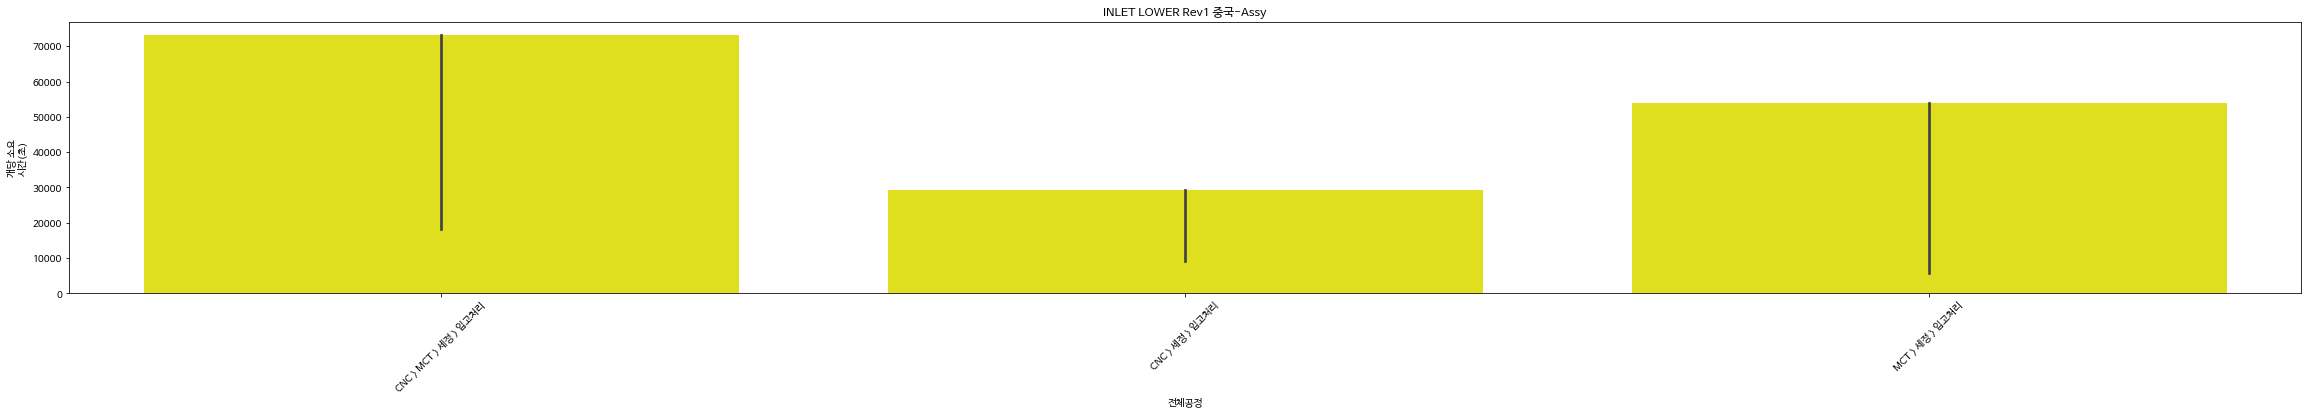

In [ ]:
df_INLET_LOWER_Rev1_중국_Assy = df[(df["품명"] == "INJECTOR BODY")& (df["고객사"] == "BU")]

plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("INLET LOWER Rev1 중국-Assy")
sns.barplot(x = '전체공정', y = '개당 소요\n시간(초)', data=df_INLET_LOWER_Rev1_중국_Assy, color = "yellow", estimator=np.max)
plt.show()

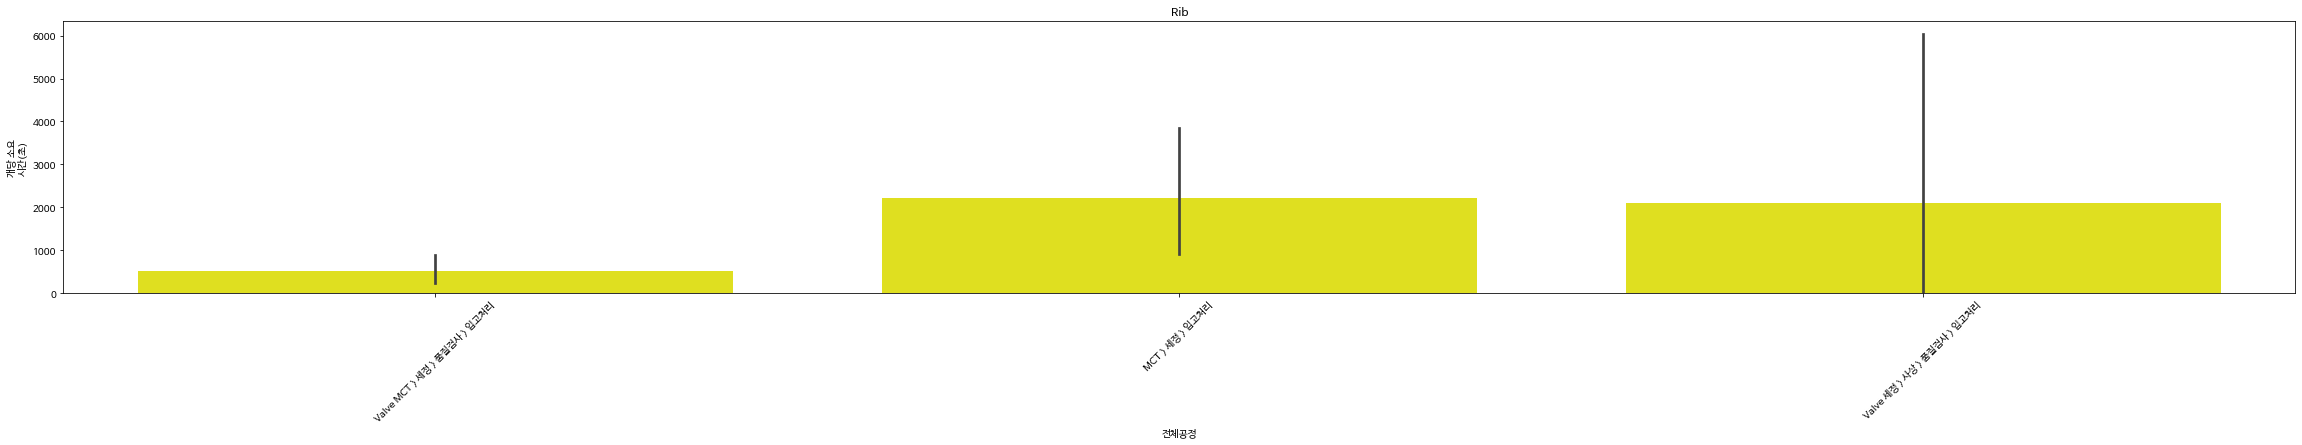

In [ ]:
df_Rib = df[(df["품명"] == "Rib")& (df["고객사"] == "DP")]

plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("Rib")
sns.barplot(x = '전체공정', y = '개당 소요\n시간(초)', data=df_Rib, color = "yellow")
plt.show()

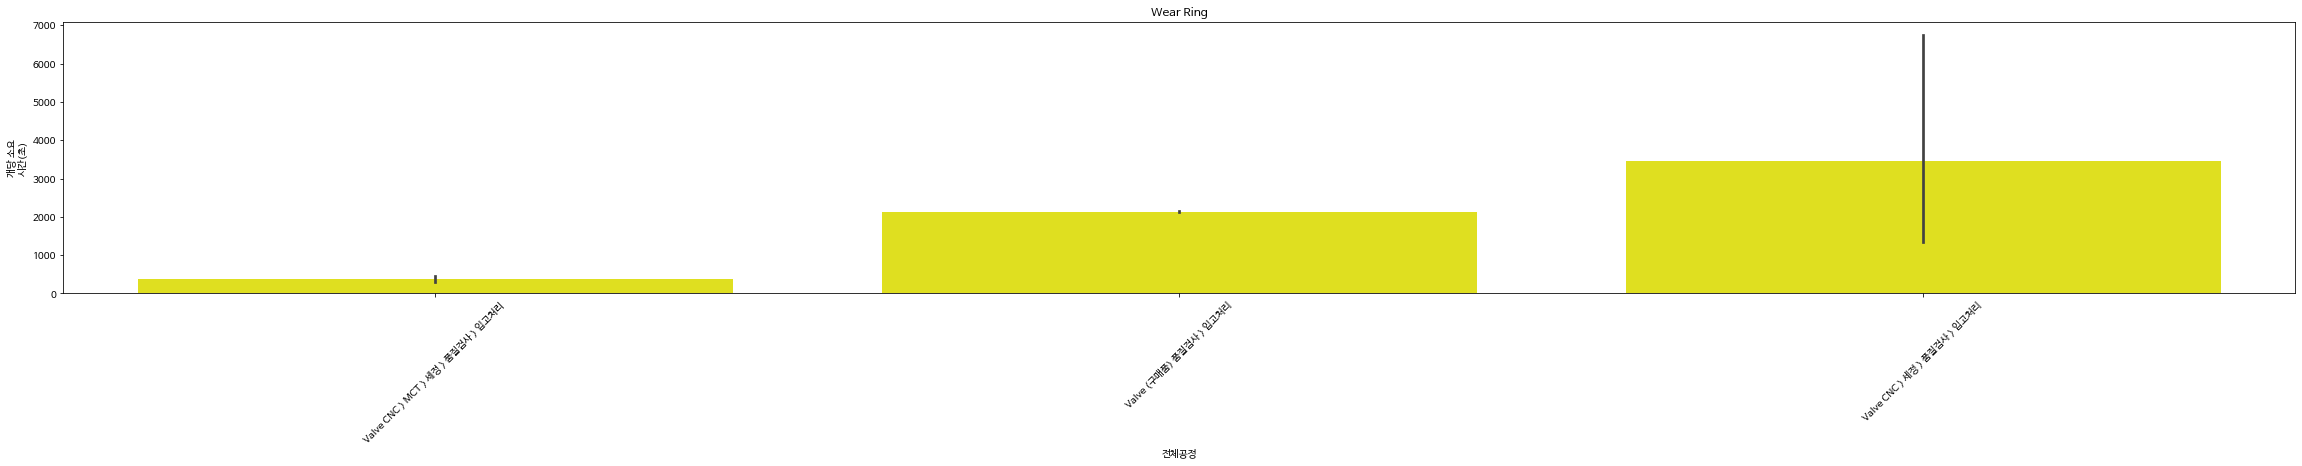

In [ ]:
df_Wear_Ring = df[(df["품명"] == "Wear Ring")& (df["고객사"] == "DP")]

plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("Wear Ring")
sns.barplot(x = '전체공정', y = '개당 소요\n시간(초)', data=df_Wear_Ring, color = "yellow")
plt.show()

In [ ]:
df[(df["품명"] == "Bonnet Weld")& (df["고객사"] == "ZD")]

,index,LOTID,라우트,전체공정,품명(코드화),품명,공정(번호),세부공정,시작시간,종료시간,시차(초),개수,개당 소요\n시간(초),고객사
27404,27404,N2006030080100,R5_02,용접 > 후처리 > 품질검사 > 입고처리,ZD-G10-B0000-00-1,Bonnet Weld,6500,수입검사(용접자재),2020-06-05 16:42:48.843,2020-06-10 10:21:38.447,409130,1,409130.00,ZD
27405,27405,N2006030080100,R5_02,용접 > 후처리 > 품질검사 > 입고처리,ZD-G10-B0000-00-1,Bonnet Weld,5000,용접,2020-06-10 10:21:38.493,2020-07-27 10:02:02.877,4059624,1,4059624.00,ZD
27406,27406,N2006030080100,R5_02,용접 > 후처리 > 품질검사 > 입고처리,ZD-G10-B0000-00-1,Bonnet Weld,6000,후처리,2020-07-27 10:02:02.987,2020-07-30 17:39:07.717,286625,1,286625.00,ZD
27407,27407,N2006030080100,R5_02,용접 > 후처리 > 품질검사 > 입고처리,ZD-G10-B0000-00-1,Bonnet Weld,8000,품질검사,2020-07-30 17:39:07.763,2020-07-30 17:39:46.787,39,1,39.00,ZD
28148,28148,N2006180300100,R5_02,용접 > 후처리 > 품질검사 > 입고처리,ZD-G07-B0000-00-1,Bonnet Weld,6500,수입검사(용접자재),2020-06-22 09:20:30.560,2020-07-16 16:05:54.080,2097924,50,41958.48,ZD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89618,89618,N2203240320100,R5_02,용접 > 후처리 > 품질검사 > 입고처리,ZD-GA6-B0001-00-1,Bonnet Weld,6000,후처리,2022-04-09 14:34:20.450,2022-04-27 08:22:26.893,1532886,1,1532886.00,ZD
89619,89619,N2203240320100,R5_02,용접 > 후처리 > 품질검사 > 입고처리,ZD-GA6-B0001-00-1,Bonnet Weld,8000,품질검사,2022-04-27 08:22:26.923,2022-04-27 08:23:39.303,73,1,73.00,ZD
89626,89626,N2203240350100,R5_02,용접 > 후처리 > 품질검사 > 입고처리,ZD-G10-B0000-00-1,Bonnet Weld,5000,용접,2022-03-25 19:56:51.473,2022-04-12 11:05:02.230,1523291,1,1523291.00,ZD
89627,89627,N2203240350100,R5_02,용접 > 후처리 > 품질검사 > 입고처리,ZD-G10-B0000-00-1,Bonnet Weld,6000,후처리,2022-04-12 11:05:02.293,2022-04-15 14:07:12.510,270130,1,270130.00,ZD


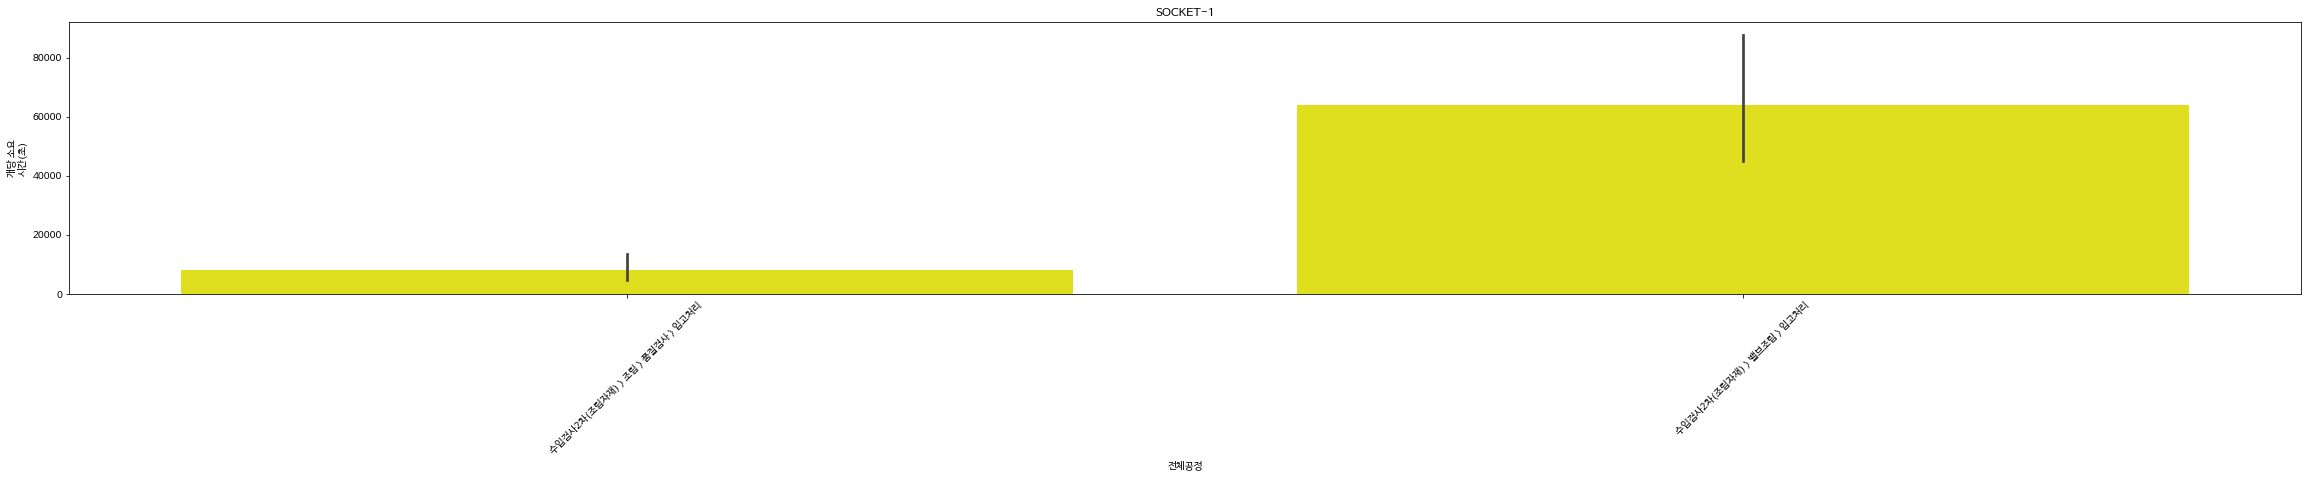

In [ ]:
df_SOCKET_1 = df[(df["품명"] == "Top Blade PART")& (df["고객사"] == "ZD")]

plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("SOCKET-1")
sns.barplot(x = '전체공정', y = '개당 소요\n시간(초)', data=df_SOCKET_1, color = "yellow")
plt.show()

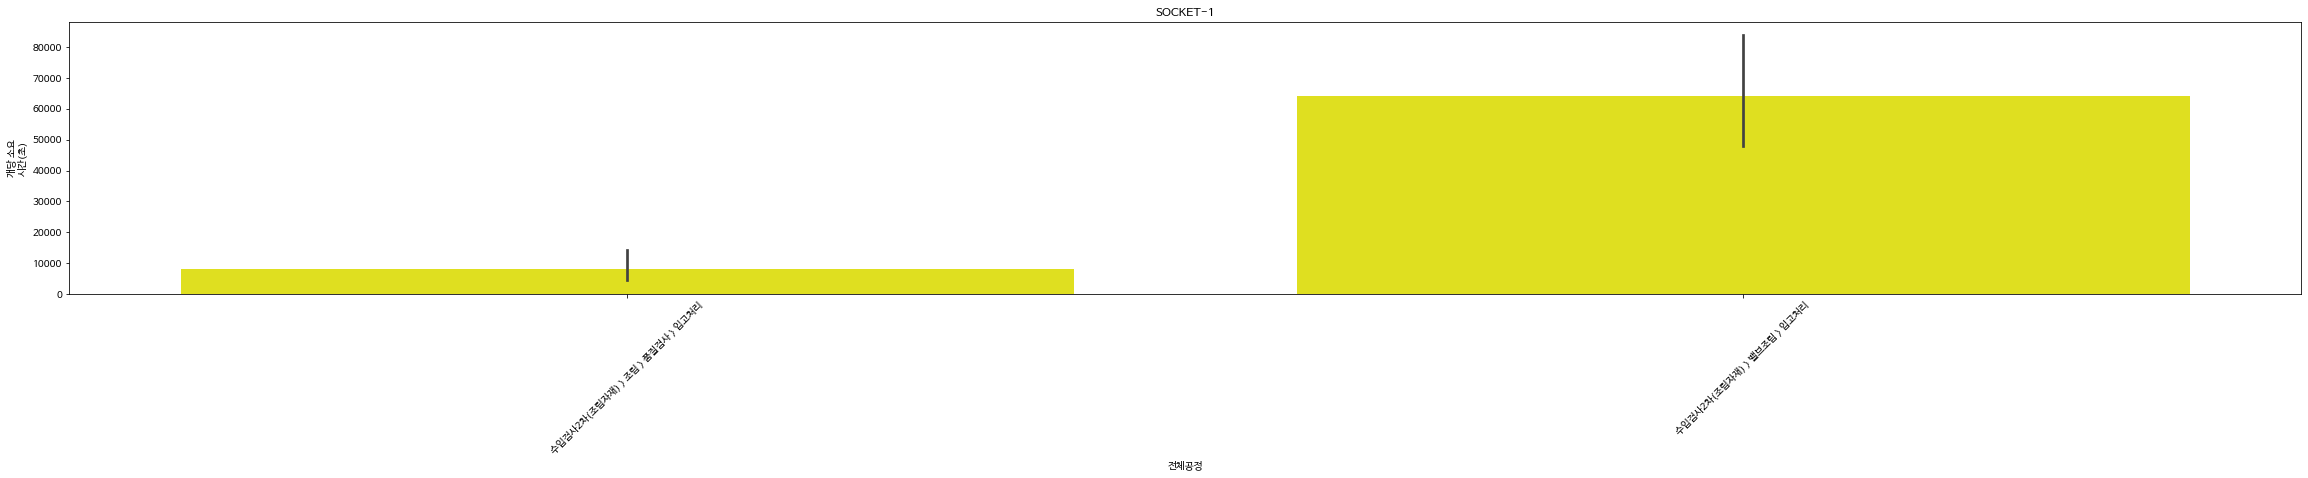

In [ ]:
df_SOCKET_1 = df[(df["품명"] == "Bottom Blade PART")& (df["고객사"] == "ZD")]

plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("SOCKET-1")
sns.barplot(x = '전체공정', y = '개당 소요\n시간(초)', data=df_SOCKET_1, color = "yellow")
plt.show()